In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "PA",
	"training_date": "current", # values: earlier, current
	"mode": "evidential2", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": True,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 6
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'PA', 'training_date': 'current', 'mode': 'evidential2', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': True, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:396 in __init__()- list(self.date_ids): [0]
ic| dataset.py:417 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
manager.config

{'training': True,
 'inferring': True,
 'site': 'PA',
 'training_date': 'current',
 'mode': 'evidential2',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': True,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [9]:
exp

6

In [10]:
manager.setExperimentPath()
manager.createLogFolders()

In [11]:
# ic(type(dataset), exp, dataset.dates)


In [12]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


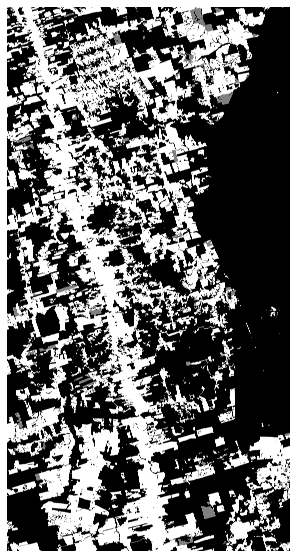

In [13]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [14]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [15]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [16]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([4077704,   24058, 4054038], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([4018062,  155579, 3982159], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([3765218,  334364, 4056218], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([6201069,  140180, 1814551], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([3907947,   93438, 4154415], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([4353664,   51100, 3751036], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([5004385,   64045, 3087370], dtype=int64))
Set 8 (array([0, 2], dtype=uint8), array([8148413,    7387], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([5158561,  138139, 2859100], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([3475926,   83519, 4596355], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([4668613,  107494, 3379693], dtype=int64))
Set 12 (array([0, 1, 2], dtype=uint8), array([7750580

In [17]:

manager.label_mask.dtype

dtype('uint8')

In [18]:

manager.getLabelCurrentDeforestation()

In [19]:

manager.loadInputImage()

ic| dataset.py:445 in loadInputImage()
    image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [20]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

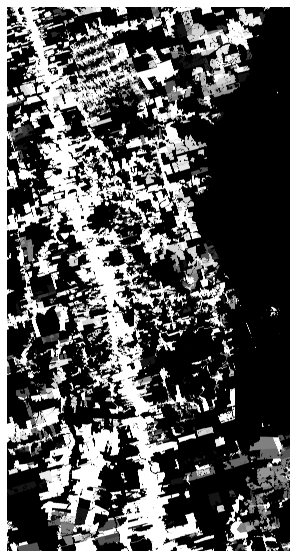

In [21]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

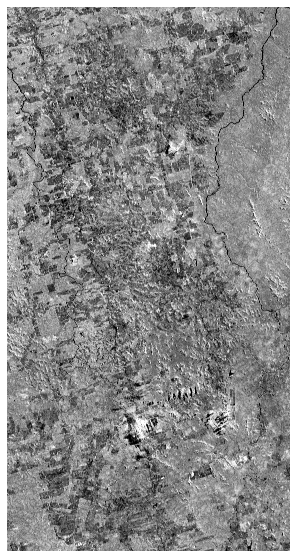

In [22]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [23]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([101787197,   1842912,  59485891], dtype=int64))

In [24]:
# manager.maskNoDataAsNotConsideredClass()

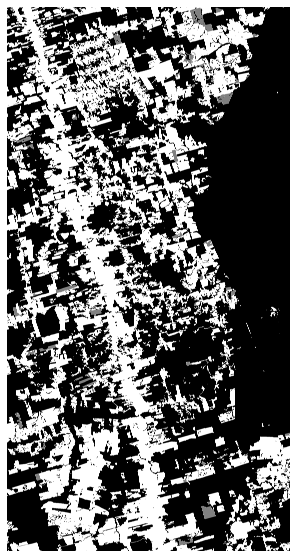

In [25]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [26]:

manager.getImageChannels()

ic| base.py:103 in getImageChannels()
    self.image_stack.shape: (17730, 9200, 21)
ic| base.py:105 in getImageChannels()- self.channels: 21


In [27]:

manager.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


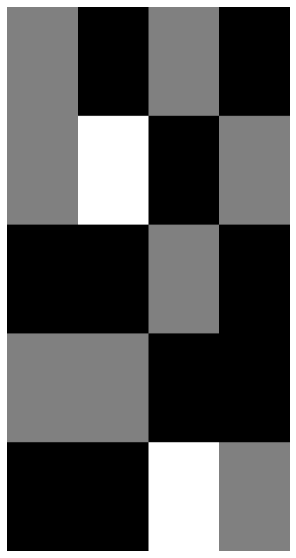

In [28]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [29]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [30]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([38533200,   804466, 25908734], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([9180568,  271248, 6859784], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([54073429,   767198, 26717373], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([101787197,   1842912,  59485891], dtype=int64))


In [31]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 3))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 3))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 3))

train unique percentage [0.591 0.012 0.397]
val unique [0.563 0.017 0.421]
test unique [0.663 0.009 0.328]


In [32]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


ic| patchesHandler.py:25 in create_idx_image()
    im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| patchesHandler.py:26 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:32 in create_idx_image()
    im_idx.shape: (17730, 9200, 2)
    im_idx.dtype: dtype('uint16')


In [33]:
if config["training"] == True:
    manager.extractCoords()

ic| patchesHandler.py:44 in extract_patches()
    coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:48 in extract_patches()
    coords.shape: (110896, 2)
    coords.dtype: dtype('uint16')


In [34]:
if config["training"] == True:
    manager.trainTestSplit()

ic| base.py:121 in trainTestSplit()
    self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [35]:
if config["training"] == True:
    manager.label_mask.shape

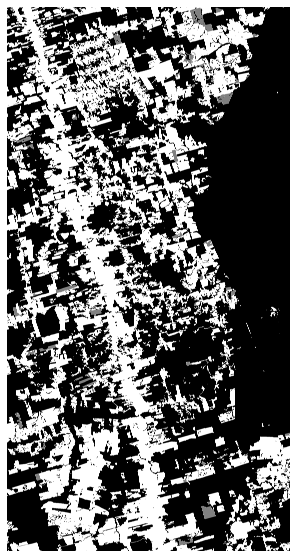

In [36]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [37]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [38]:
if config["training"] == True:
    print(manager.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [39]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

training samples:  (3756, 3) validation samples:  (1032, 3)


In [40]:
if config["training"] == True:
    inputSnipShow = True

In [41]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [42]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [43]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [45]:
manager.dataset.bands

10

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.29747355
    

[2280 4750    0]
coord [2280 4750    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.3196338
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


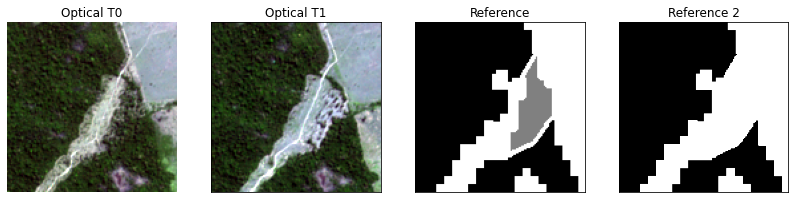

In [46]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.2714837
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]
coord [ 114 5928    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


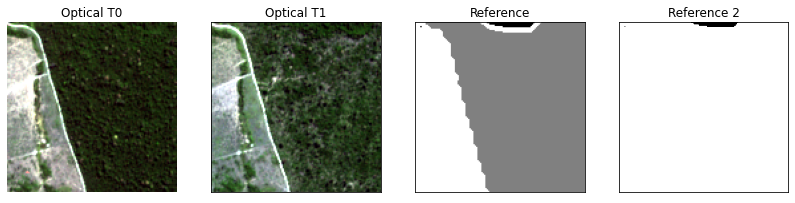

In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.44512972
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.45241854


[ 874 1026    0]
coord [ 874 1026    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


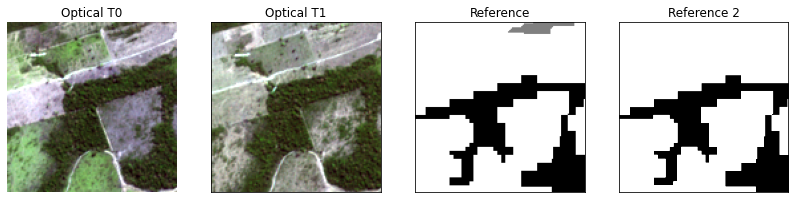

In [48]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


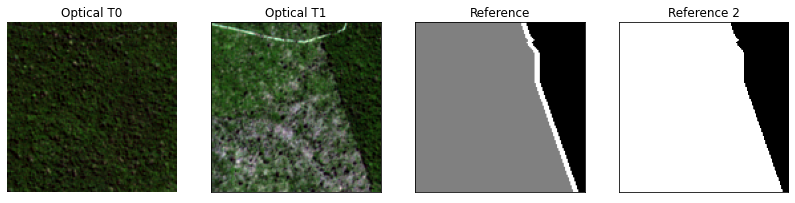

In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


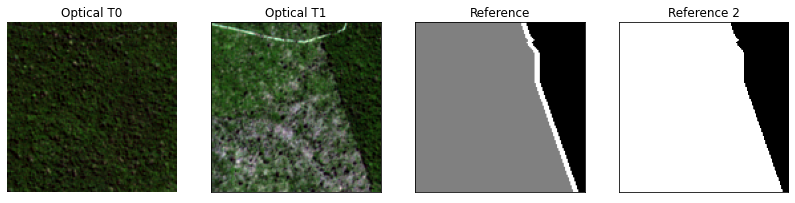

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [51]:
if config["training"] == True:
    manager.getGenerators()


In [52]:
if config["training"] == True:
    manager.fixChannelNumber()

In [53]:
if config["training"] == True:
    print(manager.path_exp)

D:/Jorge/datasets/deforestation/experiments/PA/exp6


In [54]:
if config["training"] == True:
    print(manager.channels)

21


In [55]:
if config["training"] == True:
    print(manager.image_stack.shape)

(17730, 9200, 21)


In [56]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 1


In [57]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch: 2
Anneling Coeficient [0.01333333]
352/352 [==============================] - ETA: 0s - loss: 0.1831 - accuracy: 0.1423

352/352 [==============================] - 32s 91ms/step - loss: 0.1831 - accuracy: 0.1423 - val_loss: 0.2159 - val_accuracy: 0.1756

Epoch 00001: val_loss improved from 0.21820 to 0.21590, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp6/models\resunet_0.h5
Epoch: 3
Anneling Coeficient [0.02666667]
  1/352 [..............................] - ETA: 32s - loss: 0.1961 - accuracy: 0.1625

In [ ]:
if config["training"] == True and config["mode"] != 'evidential2':
    manager.plotHistory()


In [ ]:
repetition_id = 0

In [ ]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [ ]:
manager.image_stack.shape

(17730, 9200, 21)

In [ ]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [ ]:
manager.image_stack.shape

(17730, 9200, 21)

In [ ]:
manager.setPadding()

-30.0 -16.0


In [ ]:
'''
import types
manager.infer = types.MethodType(infer, manager)
'''

'\nimport types\nmanager.infer = types.MethodType(infer, manager)\n'

In [ ]:
manager.infer()

ic| multioutput.py:152 in infer()
    self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/PA/exp6/models/resunet_0.h5'


Dropout training mode: False
time:  0
alpha.shape (17760, 9216, 2)
S.shape (17760, 9216)
K 2
u.shape (17760, 9216)
belief.shape (17760, 9216, 2)


In [ ]:
manager.prob_rec.shape

(17760, 9216, 2)

In [ ]:
manager.loadPredictedProbabilities()

In [ ]:
manager.prob_rec.shape

(17760, 9216, 2)

In [ ]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [ ]:
manager.prob_rec.shape

(17760, 9216, 2)

In [ ]:
manager.getMeanProb()

In [ ]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 0.1748777
    np.mean(value): 0.3251806
    np.max(value): 0.4753669


In [ ]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (17760, 9216, 2)


(17760, 9216, 2)

In [ ]:
manager.unpadMeanProb()

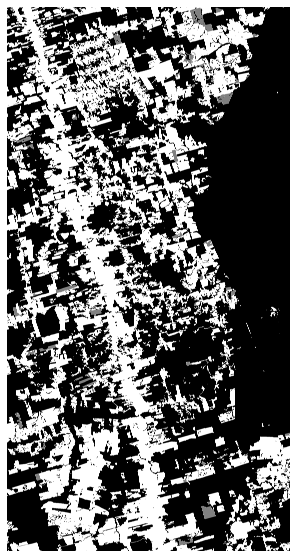

In [ ]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [ ]:
manager.squeezeLabel()

In [ ]:
manager.mean_prob.shape

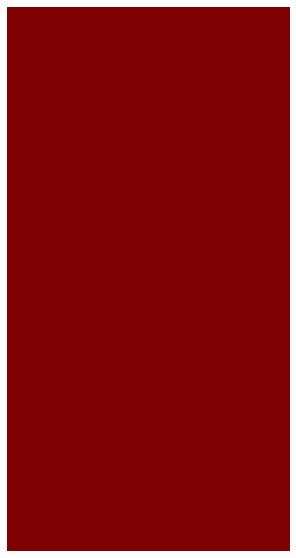

In [ ]:
manager.logger.plotFigure(manager.mean_prob[...,1], 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [ ]:
print(manager.label_mask.shape)

(17730, 9200)


In [ ]:
# manager.getLabelTest()

In [ ]:
# manager.getMAP()

In [ ]:
manager.prob_rec.shape

(17760, 9216, 2)

In [ ]:
# manager.preprocessProbRec()
# print(manager.prob_rec.shape)

In [ ]:
manager.prob_rec.shape

(17760, 9216, 2)

In [ ]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 0.1748777
    np.mean(value): 0.3251806
    np.max(value): 0.4753669


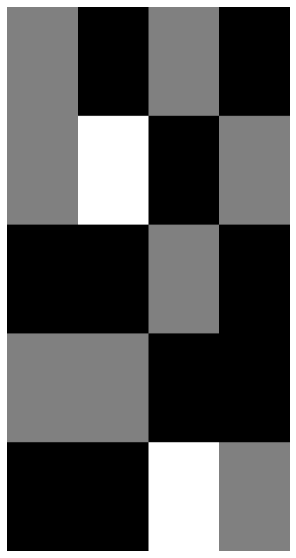

In [ ]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [ ]:
manager.getLabelCurrentDeforestation()

In [ ]:
manager.classes_mode

True

In [ ]:
manager.applyProbabilityThreshold()

(17730, 9200, 2)


In [ ]:
manager.setMeanProbNotConsideredAreas()


In [ ]:
manager.getTestValues()

ic| base.py:421 in getTestValues()- predicted_test.shape: (81558000,)
ic| base.py:430 in getTestValues()- predicted_test.shape: (54840627,)


In [ ]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0, 1], dtype=int8), array([ 59485891, 103630109], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0, 1], dtype=int8), array([ 59786753, 103329247], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0, 1], dtype=int8), array([162815138,    300862], dtype=int64))


In [ ]:
manager.calculateMetrics()

ic| base.py:474 in calculateMetrics()
    self.f1: 2.66
    self.precision: 1.35
    self.recall: 100.0


In [ ]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| multioutput.py:221 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (16311600,)
ic| multioutput.py:227 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (9422041,)
ic| base.py:485 in calculateMetricsValidation()
    f1_val: 5.44
    precision_val: 2.79
    recall_val: 100.0
    mAP_val: 2.79


In [ ]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [ ]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


In [ ]:
manager.getErrorMask()

(array([0, 1], dtype=int16), array([162318855,    797145], dtype=int64))


In [ ]:
manager.getErrorMaskToShowRGB()

[0 1]


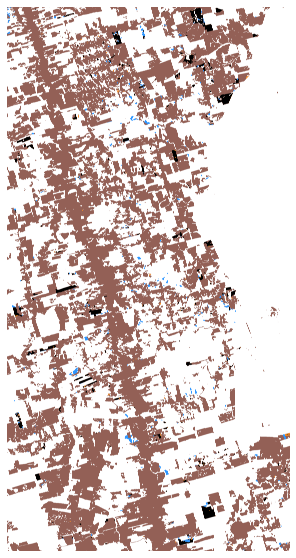

In [ ]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [ ]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [ ]:
manager.setUncertainty()

In [ ]:
manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [ ]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): 0.3497554
    np.mean(value): 0.40452084
    np.max(value): 0.5


In [ ]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.22189301
    np.max(value): 0.5


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

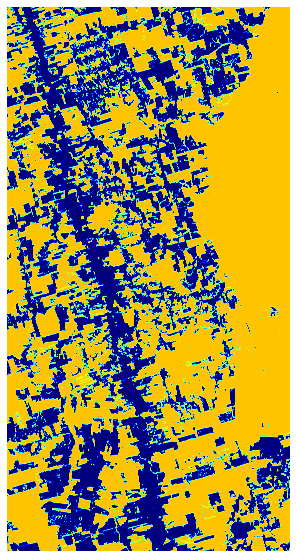

In [ ]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



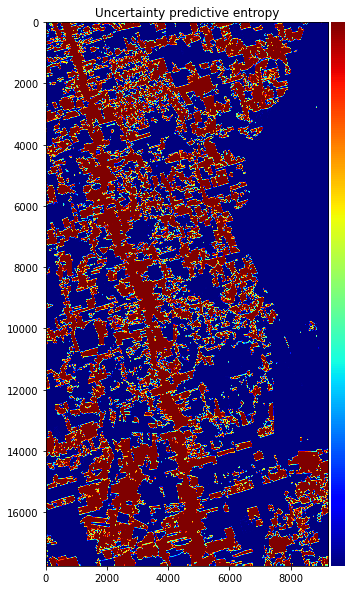

In [ ]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [ ]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:525 in getTestValues2()
    self.label_mask.shape: (17730, 9200)
ic| base.py:526 in getTestValues2()
    self.mask_amazon_ts.shape: (17730, 9200)
ic| base.py:530 in getTestValues2()
    self.label_mask_test.shape: (81558000,)
ic| base.py:538 in getTestValues2()
    self.error_mask_test.shape: (54686085,)


ic| Logger.py:163 in plotCropSample()
    manager.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    manager.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| Logger.py:165 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| Logger.py:167 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: Invalid shape (1000, 1000, 2) for image data

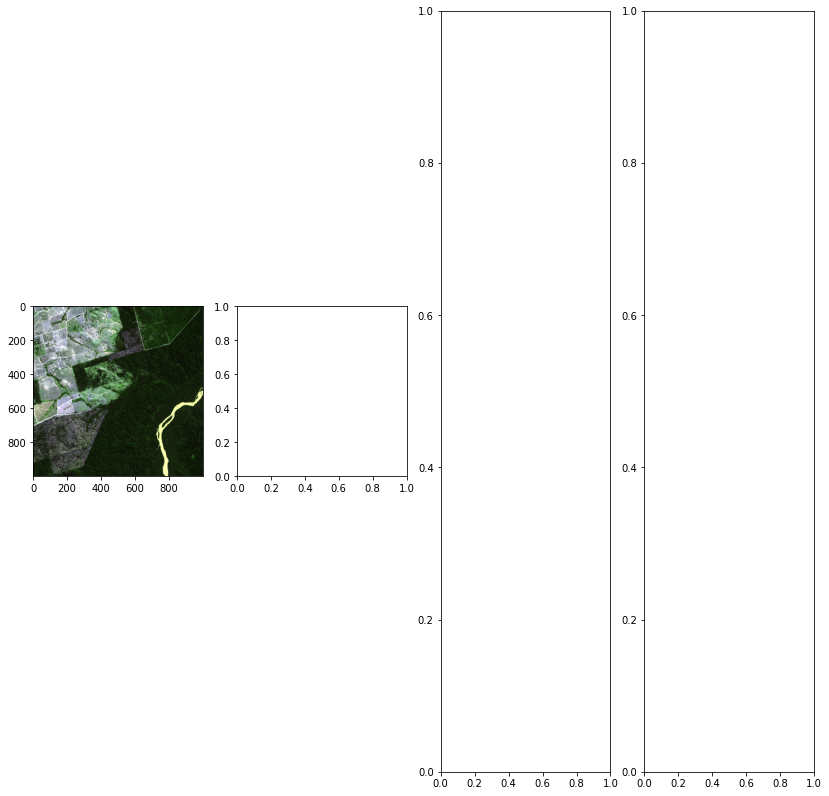

In [ ]:
manager.logger.plotCropSample(manager)

In [ ]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [ ]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [ ]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: Invalid shape (1000, 1000, 2) for image data

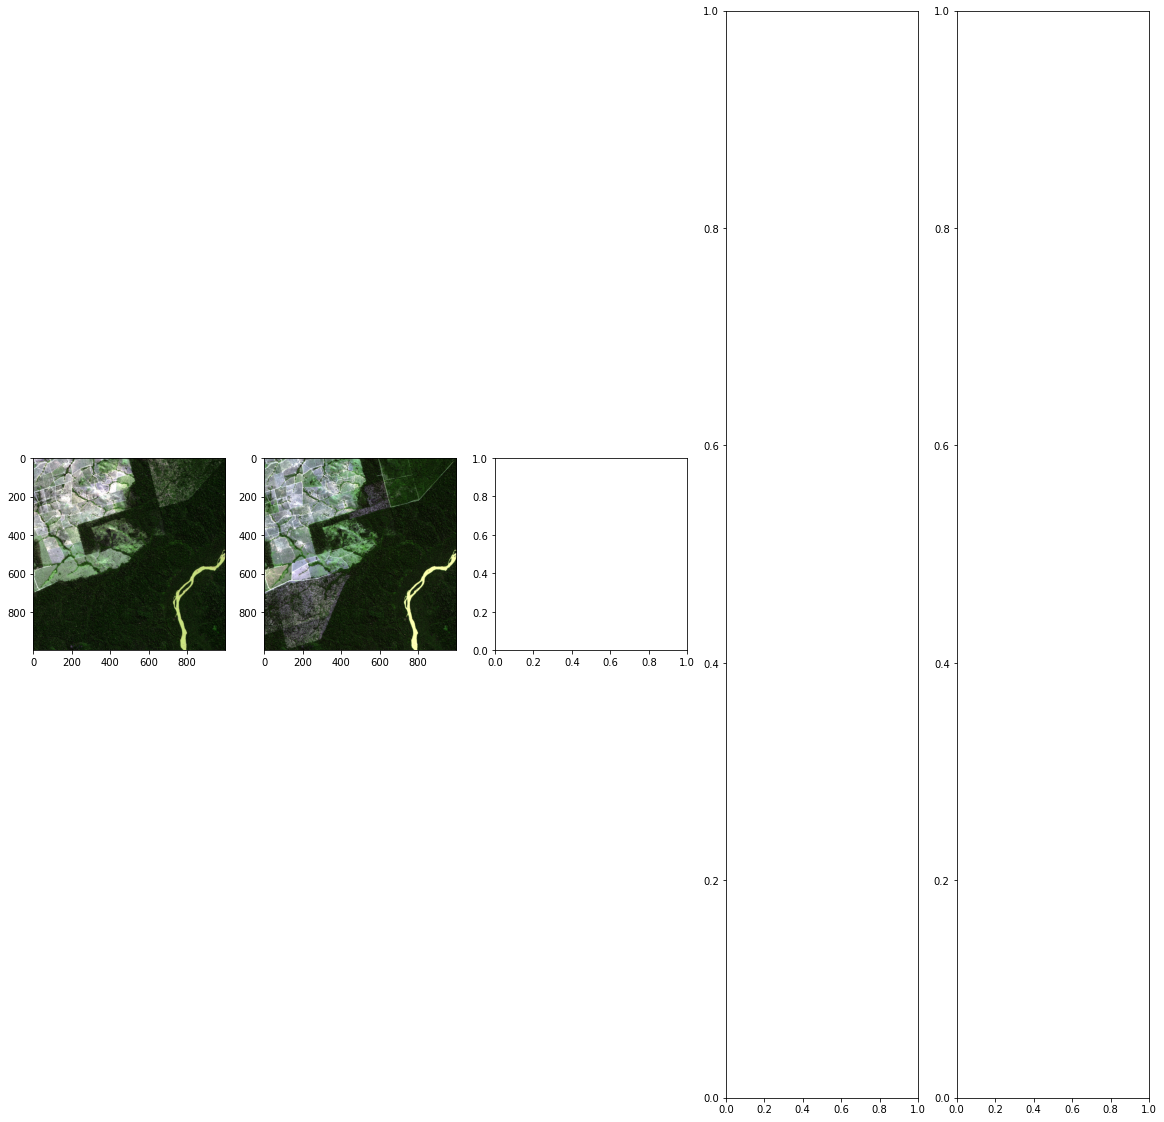

In [ ]:
manager.logger.plotCropSampleT0T1(manager)

In [ ]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:119 in getStats()
    np.min(value): 0.3497554
    np.mean(value): 0.35021952
    np.max(value): 0.5


In [ ]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [ ]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [ ]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [ ]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [ ]:
manager.config['uncertainty_method'] = 'evidential2'

In [ ]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "evidential2":
                self.threshold_list = list(np.linspace(0.353, 0.495, 10))

    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [ ]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)



Get precision-recall threshold

In [ ]:

manager.getUncertaintyAAValues()

ic| 1172573004.py:65 in getUncertaintyAAValues()
    self.uncertainty.shape: (54686085,)
    self.label_mask_current_deforestation_test.shape: (54686085,)


[0.353, 0.36877777777777776, 0.38455555555555554, 0.4003333333333333, 0.4161111111111111, 0.4318888888888889, 0.44766666666666666, 0.46344444444444444, 0.4792222222222222, 0.495]
threshold 0.353


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (347451,)
    predicted_test_classified_incorrect.shape: (347451,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 347451
    len(label_mask_current_deforestation_test): 54686085
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 347451
    len(label_mask_current_deforestation_test): 54686085


[0.74627621 0.91152612 0.88755848 0.00635355 0.28185065 0.61699501
 0.05992681]
threshold 0.36877777777777776


In [ ]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:667 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (54741989,)
    self.label_mask_current_deforestation_test.shape: (54741989,)


threshold 0.353
(54741989,) (54741989,)
cm_audited [[53912697    85041]
 [   96103   648148]]
[0.88401217 0.87087286]
threshold 0.36877777777777776
(54741989,) (54741989,)
cm_audited [[53906584    91154]
 [  101207   643044]]
[0.87584548 0.86401496]
threshold 0.38455555555555554
(54741989,) (54741989,)
cm_audited [[53903998    93740]
 [  103926   640325]]
[0.87230014 0.86036163]
threshold 0.4003333333333333
(54741989,) (54741989,)
cm_audited [[53902777    94961]
 [  104963   639288]]
[0.87066921 0.85896828]
threshold 0.4161111111111111
(54741989,) (54741989,)
cm_audited [[53901971    95767]
 [  105694   638557]]
[0.86958482 0.85798608]
threshold 0.4318888888888889
(54741989,) (54741989,)
cm_audited [[53901392    96346]
 [  106361   637890]]
[0.86878061 0.85708988]
threshold 0.44766666666666666
(54741989,) (54741989,)
cm_audited [[53900864    96874]
 [  106913   637338]]
[0.86805718 0.85634819]
threshold 0.46344444444444444
(54741989,) (54741989,)
cm_audited [[53900421    97317]
 [  107

ic| base.py:673 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.88401217, 0.87087286],
                                  [0.87584548, 0.86401496],
                                  [0.87230014, 0.86036163],
                                  [0.87066921, 0.85896828],
                                  [0.86958482, 0.85798608],
                                  [0.86878061, 0.85708988],
                                  [0.86805718, 0.85634819],
                                  [0.86744587, 0.85569385],
                                  [0.86677654, 0.85508249],
                                  [0.86575907, 0.85471971]])


cm_audited [[53899103    98635]
 [  108125   636126]]
[0.86575907 0.85471971]


In [ ]:
manager.setPlotLimsForUncertaintyAA()

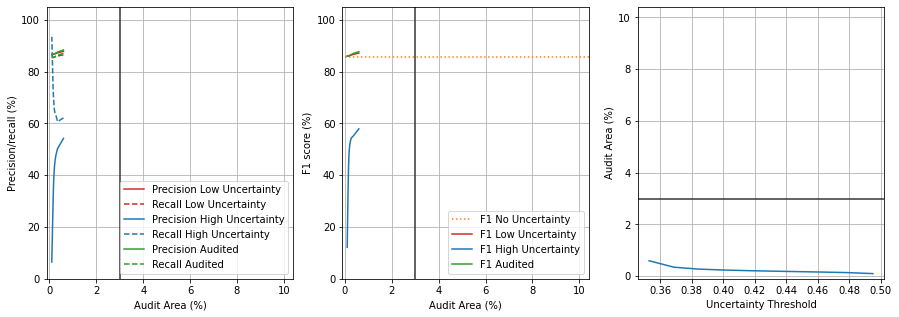

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [ ]:
from scipy import optimize  

def getOptimalUncertaintyThreshold(self, AA = 0.03, bound = 0.0015):

    def getAAFromUncertaintyThreshold(threshold): 
        print(threshold)
        metrics_values2 = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, [threshold])
        return np.abs(AA - metrics_values2[:,3].squeeze())

    bounds = (np.min(self.uncertainty) + 0.0015, np.max(self.uncertainty)-0.0015)
    ic(bounds)
    minimum = optimize.minimize_scalar(getAAFromUncertaintyThreshold, 
        method='bounded', bounds=bounds, tol=0.0001)
    self.threshold_optimal = minimum.x
    ic(self.threshold_optimal)

In [ ]:

import types

manager.getOptimalUncertaintyThreshold = types.MethodType(getOptimalUncertaintyThreshold, manager)


In [ ]:
manager.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| 2007989556.py:13 in getOptimalUncertaintyThreshold()
    bounds: (0.3512554063796997, 0.4985)


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.4074978364829885
threshold 0.4074978364829885


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (124352,)
    predicted_test_classified_incorrect.shape: (124352,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 124352
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 124352
    len(label_mask_current_deforestation_test): 54741989


[0.86872828 0.85695971 0.84784031 0.0022716  0.44453152 0.64457071
 0.02828688]
0.4422575698967112
threshold 0.4422575698967112


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (100213,)
    predicted_test_classified_incorrect.shape: (100213,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 100213
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 100213
    len(label_mask_current_deforestation_test): 54741989


[0.86749192 0.85572172 0.85054773 0.00183064 0.38026089 0.68666667
 0.02122937]
0.38601513979342245
threshold 0.38601513979342245


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (147938,)
    predicted_test_classified_incorrect.shape: (147938,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 147938
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 147938
    len(label_mask_current_deforestation_test): 54741989


[0.87011733 0.85808023 0.84517186 0.00270246 0.47507705 0.6333512
 0.03452194]
0.37273810306926575
threshold 0.37273810306926575


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (177845,)
    predicted_test_classified_incorrect.shape: (177845,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 177845
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 177845
    len(label_mask_current_deforestation_test): 54741989


[0.87210903 0.8601073  0.84161661 0.00324879 0.49650706 0.6085625
 0.04342841]
0.36453244310385635
threshold 0.36453244310385635


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (206310,)
    predicted_test_classified_incorrect.shape: (206310,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 206310
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 206310
    len(label_mask_current_deforestation_test): 54741989


[0.87367709 0.86141078 0.83855984 0.00376877 0.51106195 0.60841817
 0.04842602]
0.3594610663451091
threshold 0.3594610663451091


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (235366,)
    predicted_test_classified_incorrect.shape: (235366,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 235366
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 235366
    len(label_mask_current_deforestation_test): 54741989


[0.87507597 0.86258697 0.83571671 0.00429955 0.52202187 0.60938578
 0.05196069]
0.356326783138447
threshold 0.356326783138447


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (265006,)
    predicted_test_classified_incorrect.shape: (265006,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 265006
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 265006
    len(label_mask_current_deforestation_test): 54741989


[0.87641099 0.86354596 0.83311275 0.004841   0.529218   0.61252812
 0.05429377]
0.3543896895863618
threshold 0.3543896895863618


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (294406,)
    predicted_test_classified_incorrect.shape: (294406,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 294406
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 294406
    len(label_mask_current_deforestation_test): 54741989


[0.87750815 0.8643724  0.83070228 0.00537807 0.5365458  0.61605326
 0.05559358]
0.35319249993178486
threshold 0.35319249993178486


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (321903,)
    predicted_test_classified_incorrect.shape: (321903,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 321903
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 321903
    len(label_mask_current_deforestation_test): 54741989


[0.87853827 0.86499402 0.82858471 0.00588037 0.54128721 0.62042328
 0.05633976]
0.3524525960342766
threshold 0.3524525960342766


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (346158,)
    predicted_test_classified_incorrect.shape: (346158,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 346158
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 346158
    len(label_mask_current_deforestation_test): 54741989


[0.87940148 0.86548506 0.8266351  0.00632345 0.54612247 0.62520953
 0.05679021]
0.351995310277208
threshold 0.351995310277208


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (365910,)
    predicted_test_classified_incorrect.shape: (365910,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 365910
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 365910
    len(label_mask_current_deforestation_test): 54741989


[0.88009257 0.86586243 0.82522832 0.00668427 0.54855571 0.62799553
 0.05698918]
0.35171269213676837
threshold 0.35171269213676837


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (380587,)
    predicted_test_classified_incorrect.shape: (380587,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 380587
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 380587
    len(label_mask_current_deforestation_test): 54741989


[0.88056558 0.86610232 0.82413729 0.00695238 0.55099075 0.63076454
 0.05701882]
0.3515380245201394
threshold 0.3515380245201394


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (390966,)
    predicted_test_classified_incorrect.shape: (390966,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 390966
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 390966
    len(label_mask_current_deforestation_test): 54741989


[0.88088838 0.86628243 0.8233647  0.00714198 0.55276132 0.63248535
 0.05703579]
0.3514300739963287
threshold 0.3514300739963287


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (398116,)
    predicted_test_classified_incorrect.shape: (398116,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 398116
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 398116
    len(label_mask_current_deforestation_test): 54741989


[0.88112531 0.86638976 0.8228474  0.00727259 0.55369739 0.63378248
 0.05703616]
0.35136335690351034
threshold 0.35136335690351034


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (402749,)
    predicted_test_classified_incorrect.shape: (402749,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 402749
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 402749
    len(label_mask_current_deforestation_test): 54741989


[0.88129002 0.86646661 0.82248731 0.00735722 0.55433777 0.63463575
 0.05707265]
0.351322123472518
threshold 0.351322123472518


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (405757,)
    predicted_test_classified_incorrect.shape: (405757,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 405757
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 405757
    len(label_mask_current_deforestation_test): 54741989


[0.88137685 0.86653253 0.82230188 0.00741217 0.55464311 0.63471005
 0.05707192]
0.35128878492823545
threshold 0.35128878492823545


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (408235,)
    predicted_test_classified_incorrect.shape: (408235,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 408235
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 408235
    len(label_mask_current_deforestation_test): 54741989
ic| 2007989556.py:17 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.35128878492823545


[0.88146535 0.86658292 0.82211915 0.00745744 0.55491224 0.63498049
 0.05710123]


In [ ]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.35128878492823545


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (408235,)
    predicted_test_classified_incorrect.shape: (408235,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 408235
    len(label_mask_current_deforestation_test): 54741989
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 408235
    len(label_mask_current_deforestation_test): 54741989


[0.88146535 0.86658292 0.82211915 0.00745744 0.55491224 0.63498049
 0.05710123]
threshold 0.35128878492823545
(54741989,) (54741989,)


ic| base.py:808 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.00745744]),
                     'UEO': array([0.05710123]),
                     'f1': 85.84,
                     'f1_H': array([0.59225245]),
                     'f1_L': array([0.87396078]),
                     'precision_H': array([0.55491224]),
                     'precision_L': array([0.88146535]),
                     'recall_H': array([0.63498049]),
                     'recall_L': array([0.86658292]),
                     'recall_Ltotal': array([0.82211915])}
ic| base.py:809 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.88047997]),
                             'precision': array([0.88764628]),
                             'recall': array([0.87342845])}


cm_audited [[53915458    82280]
 [   94201   650050]]
[0.88764628 0.87342845]


{'metrics': {'precision_L': array([0.88146535]),
  'recall_L': array([0.86658292]),
  'recall_Ltotal': array([0.82211915]),
  'AA': array([0.00745744]),
  'precision_H': array([0.55491224]),
  'recall_H': array([0.63498049]),
  'UEO': array([0.05710123]),
  'f1_L': array([0.87396078]),
  'f1_H': array([0.59225245]),
  'f1': 85.84},
 'metrics_audited': {'precision': array([0.88764628]),
  'recall': array([0.87342845]),
  'f1': array([0.88047997])},
 'exp': 7}